In [79]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [82]:
#importing excel file using pandas
df=pd.read_csv('/content/drive/MyDrive/Datasets/vgsales.csv')


In [83]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [84]:
df.shape

(16598, 11)

In [85]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [87]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [88]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [89]:
df = df.dropna(subset=['Year'])
df['Year']

,Year
0,1980.0
1,1980.0
2,1980.0
3,1980.0
4,1980.0
...,...
16322,2016.0
16323,2017.0
16324,2017.0
16325,2017.0


In [90]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,36
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [91]:
df=df.dropna(subset=['Publisher'])

In [92]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [93]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [94]:
df['Year']=df['Year'].astype(int)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [95]:
df['Genre'].unique()

array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [96]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [97]:
df['Year'].value_counts()

,count
Year,
2009,1431
2008,1428
2010,1257
2007,1201
2011,1136
2006,1008
2005,936
2002,829
2003,775


In [98]:
df['Year'].value_counts().sort_index(ascending=True)

,count
Year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [99]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [100]:
df1=df[df['Genre']=="Shooter"][["Genre"]].count()


In [101]:
df1

,0
Genre,1282


In [102]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [103]:
df2=df['Platform'].count()

In [104]:
df2

16291

In [105]:
df3=df.groupby(["Year","Genre"]).agg({"Global_Sales":"count"})
df3

Global_Sales
Year Genre                     
1980 Action                   1
     Fighting                 1
     Misc                     4
     Shooter                  2
     Sports                   1
...                         ...
2016 Sports                  38
     Strategy                10
2017 Action                   1
     Role-Playing             2
2020 Simulation               1

[389 rows x 1 columns]

In [106]:
df4=df.groupby(["Year","Genre"]).agg({"Rank":"max"})
df4

Rank
Year Genre              
1980 Action         5368
     Fighting       2671
     Misc           6898
     Shooter         545
     Sports         4027
...                  ...
2016 Sports        16579
     Strategy      16558
2017 Action        16441
     Role-Playing  16244
2020 Simulation     5959

[389 rows x 1 columns]

In [107]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [108]:
df5=df.groupby(["Year","Genre"])
df5

In [109]:
df6=df['Publisher'].unique()
df6

array(['Atari', 'Activision', 'Parker Bros.', 'Imagic', 'Coleco',
       'Mystique', '20th Century Fox Video Games', 'Men-A-Vision',
       'Tigervision', 'Mattel Interactive', 'Data Age', 'Starpath Corp.',
       'Unknown', 'Taito', 'Quelle', 'Universal Gamex',
       'Wizard Video Games', 'CPG Products', 'Answer Software', 'Sega',
       'ITT Family Games', 'CBS Electronics', 'Bomb',
       'Avalon Interactive', 'Nintendo', 'Namco Bandai Games',
       'Hudson Soft', 'Capcom', 'Mycom', 'Konami Digital Entertainment',
       'Enix Corporation', 'SquareSoft', 'Maxis', 'Palcom',
       'HAL Laboratory', 'Square', 'Human Entertainment', 'Banpresto',
       'BPS', 'Angel Studios', 'Tecmo Koei', 'Culture Brain', 'Imagineer',
       'Epoch', 'Kemco', 'Arena Entertainment', 'Virgin Interactive',
       'Takara', 'Ocean', 'Video System', 'ChunSoft', 'Electronic Arts',
       'id Software', 'New World Computing', 'Acclaim Entertainment',
       'Laguna', 'Sammy Corporation', 'Hect', 'SNK', 'T&

In [110]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


<Axes: xlabel='Genre', ylabel='count'>

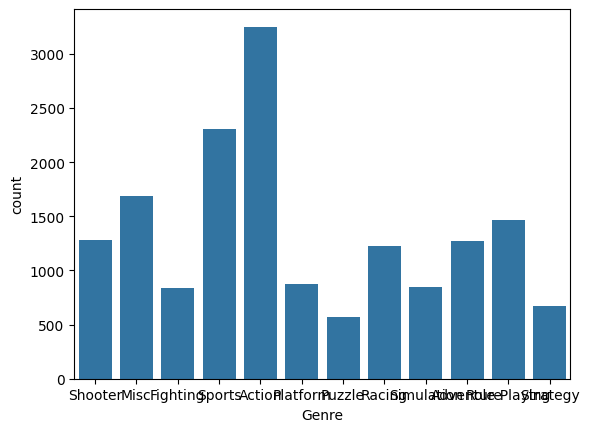

In [111]:

sns.countplot(x='Genre',data=df)

In [112]:
df7=df['Genre'].value_counts()

In [113]:
df7

,count
Genre,
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848


In [114]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


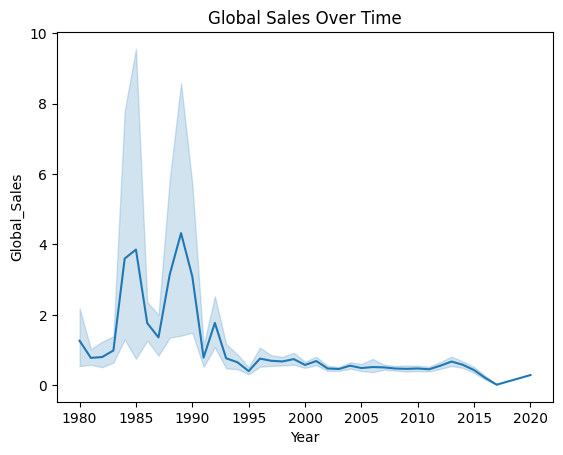

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

sns.lineplot(data=df, x='Year', y='Global_Sales')

# Add labels and title
plt.xlabel('Year')  # Now using plt alias for matplotlib.pyplot
plt.ylabel('Global_Sales')
plt.title('Global Sales Over Time')

# Show the plot
plt.show()


In [118]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


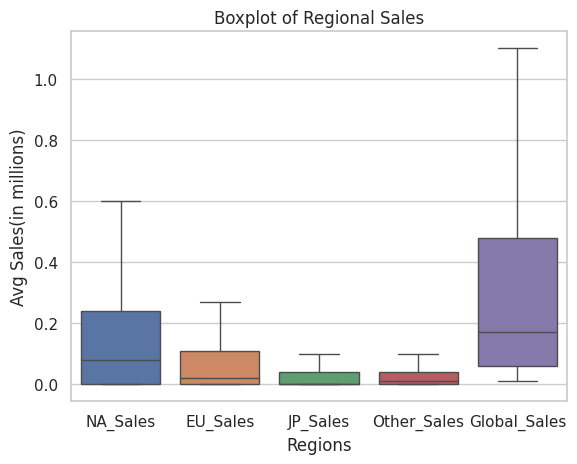

In [123]:
kf = df.drop(["Rank","Year"],axis=1)
sns.set(style="whitegrid")
sns.boxplot(data=kf, showfliers = False)
plt.xlabel("Regions")
plt.ylabel("Avg Sales(in millions)")
plt.title("Boxplot of Regional Sales")
plt.show()


In [124]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [132]:
df8=df.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).head(20)
df8

,JP_Sales
Publisher,
Nintendo,454.99
Namco Bandai Games,126.84
Konami Digital Entertainment,90.93
Sony Computer Entertainment,74.10
Capcom,67.38
Sega,56.19
Square Enix,49.79
SquareSoft,40.13
Enix Corporation,32.40


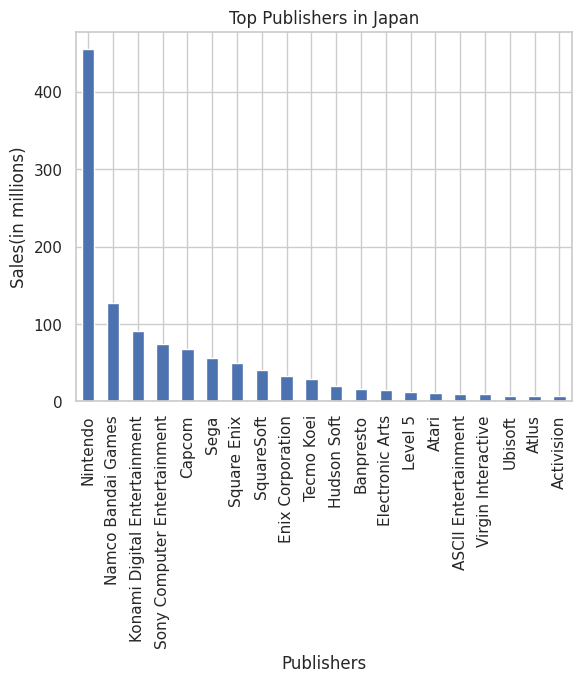

In [136]:
df.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False).head(20).plot(kind="bar")
plt.xlabel("Publishers")
plt.ylabel("Sales(in millions)")
plt.title("Top Publishers in Japan")
plt.show()


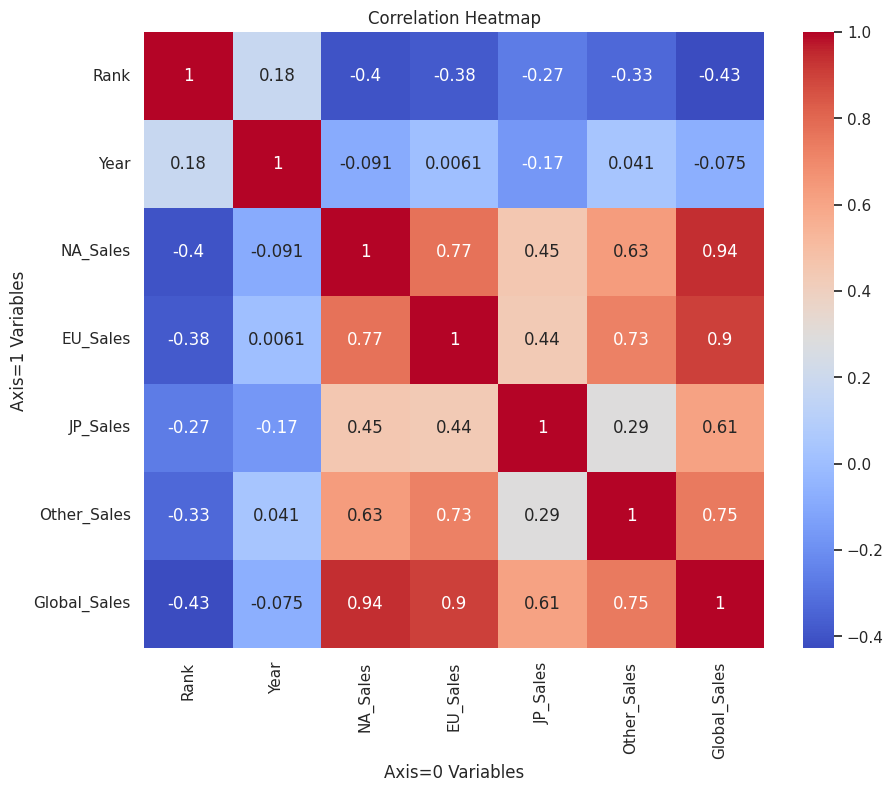

In [140]:
plt.figure(figsize=(10, 8))
kf = df.select_dtypes(include=["number"])
sns.heatmap(kf.corr(), annot=True, cmap='coolwarm')
plt.xlabel("Axis=0 Variables")
plt.ylabel("Axis=1 Variables")
plt.title("Correlation Heatmap")
plt.show()